# Candy Analysis

Our task is to create new candy product. We have available market research, which could give us some insights how ideal candy might look like.

Let's start with importing of python libraries.

In [1]:
# import modules and libraries
import pandas as pd
import numpy as np
import modules.data_processing as data_processing
import modules.plots as plots
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn import tree
from matplotlib import pyplot as plt
import plotly.express as px

## Data Exploration

In [2]:
# load data
df_candy = pd.read_csv('data/candy-data.csv', na_values="")
response = 'winpercent'

df_candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [3]:
df_candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


Data that we've recieved have 85 different candies with their attributes and overal win rate. We can take a look at the candie's attributes and investigate average win rates.

### Chocolate

In [4]:
plots.investigate_categoric_variable(df_candy, response, ['chocolate'], ["Unknown"])

This variable contains these levels: [0, 1]
Number of observation by level of this variable: [48, 37]
Mean value of response by level of this variable: [42.142257, 60.9215294054054]
Mean fitted value by level of this variable: None


Graph suggest that on average people like chocolate candies more.

### Fruity

In [5]:
plots.investigate_categoric_variable(df_candy, response, ['fruity'], ["Unknown"])

This variable contains these levels: [0, 1]
Number of observation by level of this variable: [47, 38]
Mean value of response by level of this variable: [55.32712234042553, 44.11974142105263]
Mean fitted value by level of this variable: None


Fruity candies are less popular on average.

### Caramel

In [6]:
plots.investigate_categoric_variable(df_candy, response, ['caramel'], ["Unknown"])

This variable contains these levels: [0, 1]
Number of observation by level of this variable: [71, 14]
Mean value of response by level of this variable: [48.93053825352113, 57.34690771428571]
Mean fitted value by level of this variable: None


Caramel has higher popularity on average, however sample size is smaller so this is less credible insight.

### Peanutyalmondy

In [7]:
plots.investigate_categoric_variable(df_candy, response, ['peanutyalmondy'], ["Unknown"])

This variable contains these levels: [0, 1]
Number of observation by level of this variable: [71, 14]
Mean value of response by level of this variable: [47.6783804084507, 63.697136785714285]
Mean fitted value by level of this variable: None


Peanuty-almondy candy seems to be very popular on average.

### Nougat 

In [8]:
plots.investigate_categoric_variable(df_candy, response, ['nougat'], ["Unknown"])

This variable contains these levels: [0, 1]
Number of observation by level of this variable: [78, 7]
Mean value of response by level of this variable: [49.44309958974359, 60.05187942857143]
Mean fitted value by level of this variable: None


Nougat seems to be popular, but we have very small sample size.

### Crispedricewafer  

In [9]:
plots.investigate_categoric_variable(df_candy, response, ['crispedricewafer'], ["Unknown"])

This variable contains these levels: [0, 1]
Number of observation by level of this variable: [78, 7]
Mean value of response by level of this variable: [48.89401487179487, 66.170252]
Mean fitted value by level of this variable: None


Crisped-rise-wafer did well in market research.

### Hard 

In [10]:
plots.investigate_categoric_variable(df_candy, response, ['hard'], ["Unknown"])

This variable contains these levels: [0, 1]
Number of observation by level of this variable: [70, 15]
Mean value of response by level of this variable: [52.41843138571429, 40.5089818]
Mean fitted value by level of this variable: None


Hard candies appear to be very unpopular in the market.
### Bar 

In [11]:
plots.investigate_categoric_variable(df_candy, response, ['bar'], ["Unknown"])

This variable contains these levels: [0, 1]
Number of observation by level of this variable: [64, 21]
Mean value of response by level of this variable: [46.714394671875, 61.29541261904762]
Mean fitted value by level of this variable: None


Bars have high popularity.

### Pluribus

In [12]:
plots.investigate_categoric_variable(df_candy, response, ['pluribus'], ["Unknown"])

This variable contains these levels: [0, 1]
Number of observation by level of this variable: [41, 44]
Mean value of response by level of this variable: [54.06640409756098, 46.82278081818181]
Mean fitted value by level of this variable: None


Package with multiple candy pieces doesn't seem to attract people.

### Sugarpercent

In [13]:
bin_list = [-1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.001]
label_list = ['[' + str(round(bin_list[i], 2)) + ',' + str(round(bin_list[i+1], 2)) + ')' for i in range(len(bin_list)-1)]
df_candy_adjusted = data_processing.bin_numeric_variable(df_candy, bin_list, label_list, 'sugarpercent')

plots.investigate_categoric_variable(df_candy_adjusted, response, ['sugarpercent_binned'], ["Unknown"])

This variable contains these levels: ['[-1,0.1)', '[0.1,0.2)', '[0.2,0.3)', '[0.3,0.4)', '[0.4,0.5)', '[0.5,0.6)', '[0.6,0.7)', '[0.7,0.8)', '[0.8,0.9)', '[0.9,1.0)']
Number of observation by level of this variable: [10, 8, 7, 9, 12, 5, 10, 9, 7, 8]
Mean value of response by level of this variable: [44.146150999999996, 45.01393975, 42.545578, 50.966114, 51.23705291666667, 59.945599400000006, 54.6483922, 48.20921422222222, 56.84213428571429, 53.25042525]
Mean fitted value by level of this variable: None


There is a slight trend, more sugary candies are more popular.

### Pricepercent

In [14]:
bin_list = [-1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.001]
label_list = ['[' + str(round(bin_list[i], 2)) + ',' + str(round(bin_list[i+1], 2)) + ')' for i in range(len(bin_list)-1)]
df_candy_adjusted = data_processing.bin_numeric_variable(df_candy_adjusted, bin_list, label_list, 'pricepercent')


plots.investigate_categoric_variable(df_candy_adjusted, response, ['pricepercent_binned'], ["Unknown"])

This variable contains these levels: ['[-1,0.1)', '[0.1,0.2)', '[0.2,0.3)', '[0.3,0.4)', '[0.4,0.5)', '[0.5,0.6)', '[0.6,0.7)', '[0.7,0.8)', '[0.8,0.9)', '[0.9,1.0)']
Number of observation by level of this variable: [8, 10, 8, 11, 6, 12, 9, 7, 6, 8]
Mean value of response by level of this variable: [40.0485875, 42.0608038, 56.491349125, 41.154033363636366, 48.74232483333333, 47.24931075, 71.9254658888889, 54.151953142857145, 55.943454833333334, 51.22546925]
Mean fitted value by level of this variable: None


Cheaper candies are overally less popular than more expensive ones.

## Decision Tree

Our datasample has only 85 observations, this means that we cannot use sophisticated machine learning models to find more interesting insights. Complicated machine learning models in such cases might see unexisting patterns and it could misslead us. We should try something very simple. Linear regression here could be good option, it can generalize well simple linear data and it doesn't necessary require large datasets. But maybe in this case I would prefer to use decision tree, which is simple machine learning method based on application of pependicular splits on data. It can perform well with small datasets and segments dataset from its nature. This should help us to find groups in data which are most (or least) popular. 

[Text(0.5, 0.875, 'chocolate <= 0.5\nsquared_error = 213.965\nsamples = 85\nvalue = 50.317'),
 Text(0.25, 0.625, 'fruity <= 0.5\nsquared_error = 102.292\nsamples = 48\nvalue = 42.142'),
 Text(0.125, 0.375, 'pluribus <= 0.5\nsquared_error = 44.207\nsamples = 11\nvalue = 35.933'),
 Text(0.0625, 0.125, 'squared_error = 40.13\nsamples = 5\nvalue = 39.762'),
 Text(0.1875, 0.125, 'squared_error = 25.205\nsamples = 6\nvalue = 32.742'),
 Text(0.375, 0.375, 'sugarpercent <= 0.79\nsquared_error = 104.689\nsamples = 37\nvalue = 43.988'),
 Text(0.3125, 0.125, 'squared_error = 102.469\nsamples = 30\nvalue = 42.188'),
 Text(0.4375, 0.125, 'squared_error = 40.778\nsamples = 7\nvalue = 51.704'),
 Text(0.75, 0.625, 'peanutyalmondy <= 0.5\nsquared_error = 159.689\nsamples = 37\nvalue = 60.922'),
 Text(0.625, 0.375, 'caramel <= 0.5\nsquared_error = 143.932\nsamples = 25\nvalue = 57.282'),
 Text(0.5625, 0.125, 'squared_error = 126.408\nsamples = 18\nvalue = 53.578'),
 Text(0.6875, 0.125, 'squared_error = 

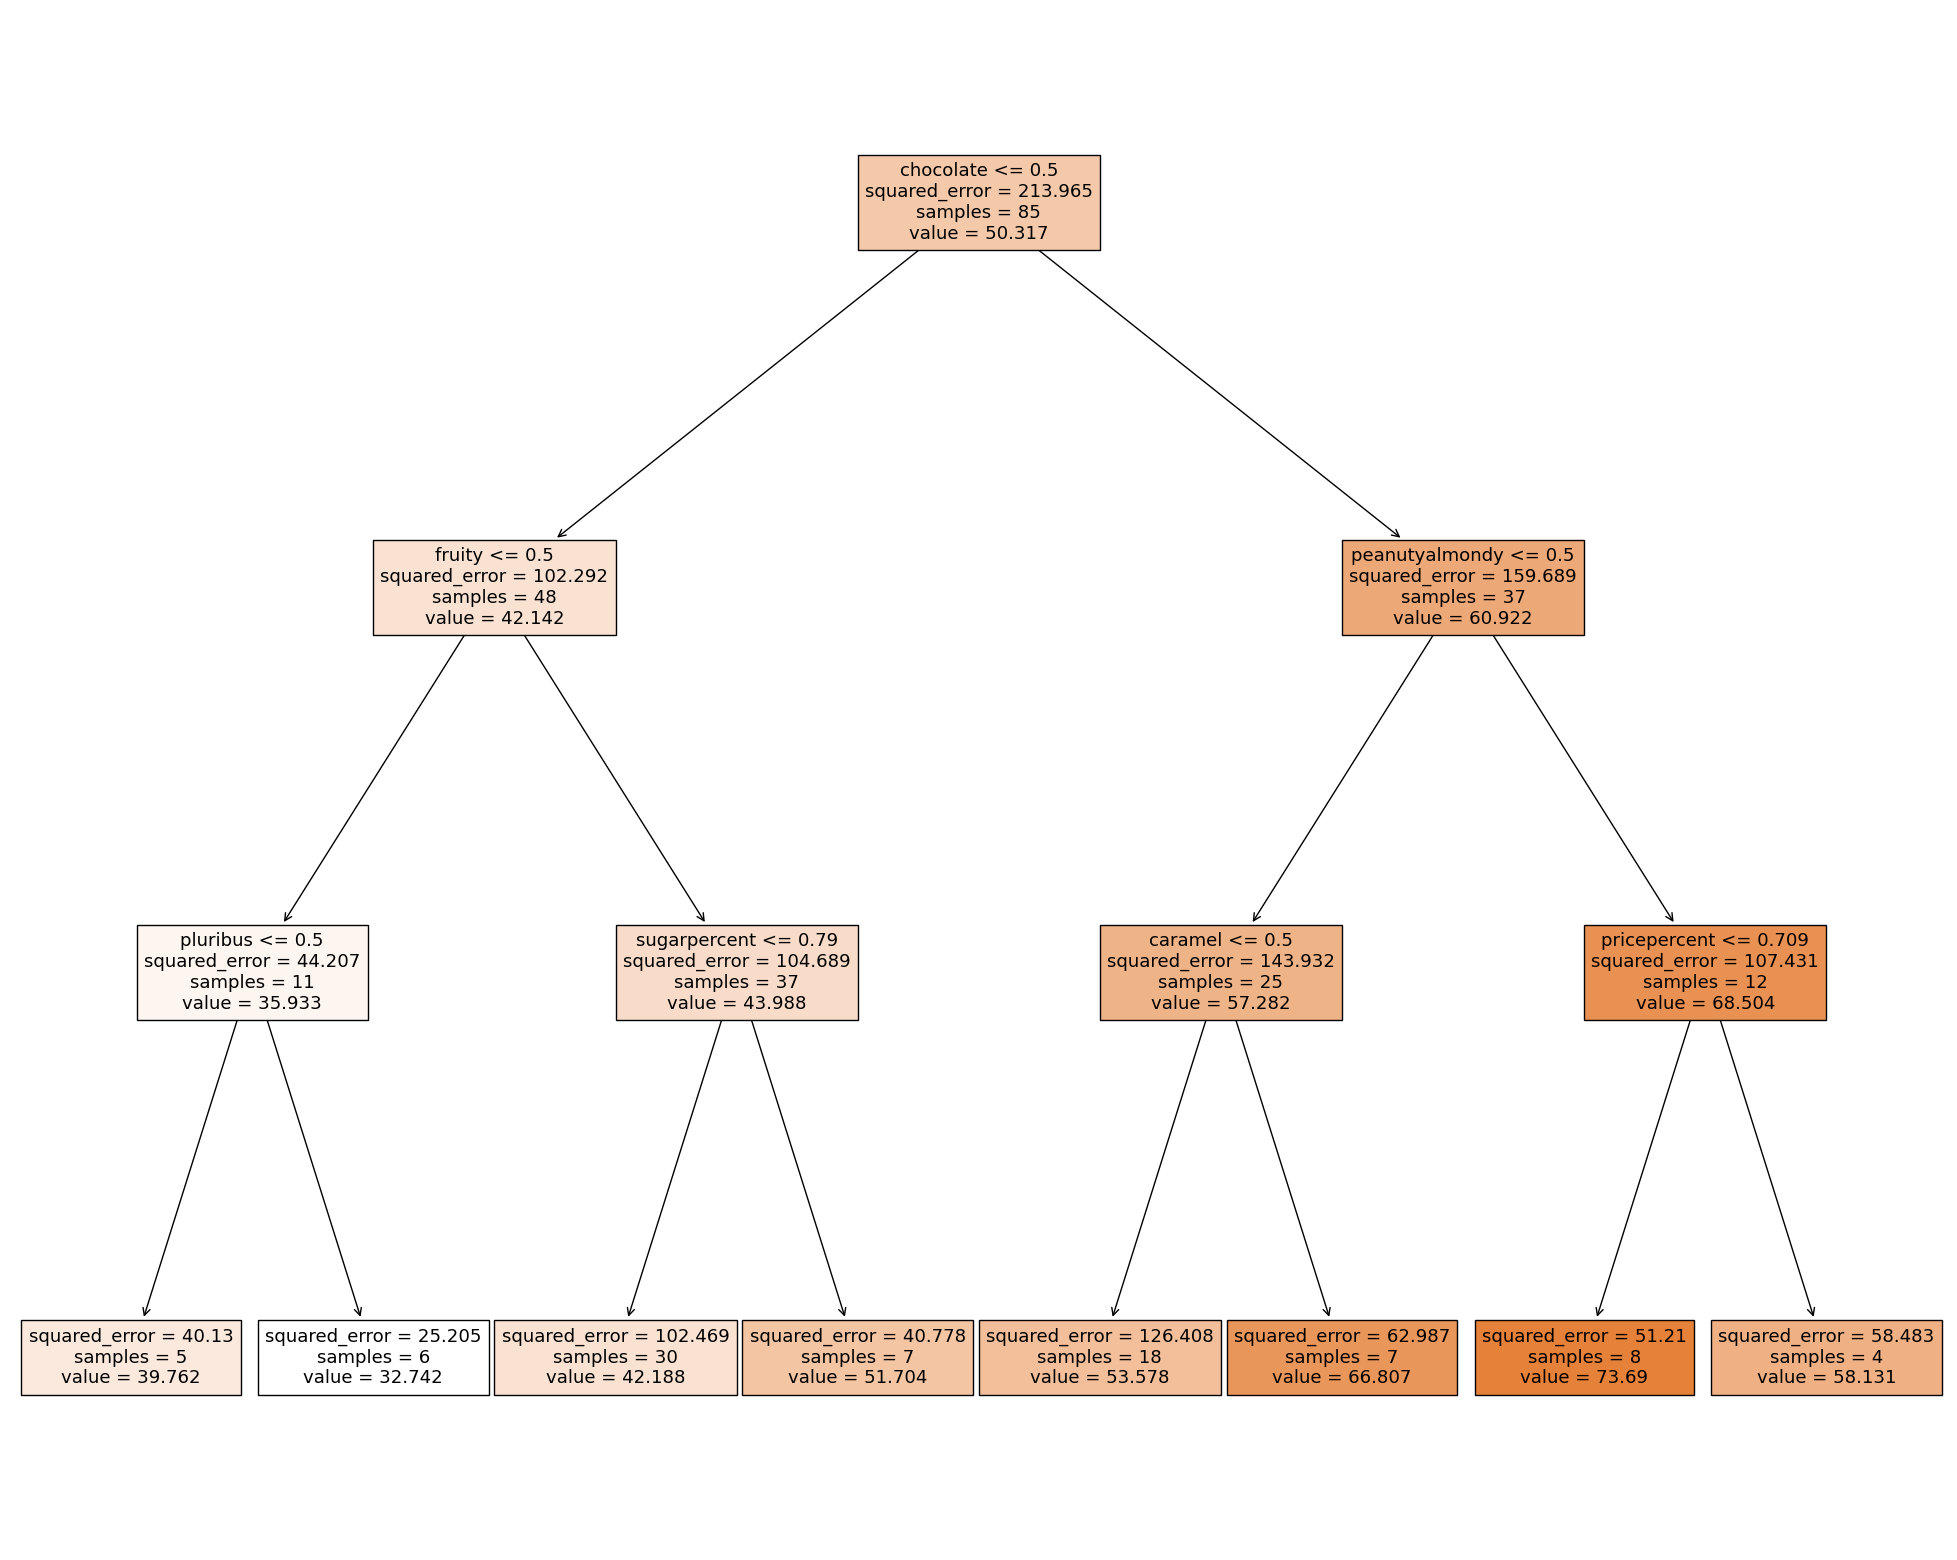

In [15]:
features = [feature for feature in df_candy.columns if feature not in [response, 'competitorname', 'sugarpercent_binned', 'pricepercent_binned']]
X_train = df_candy[features]
y_train = df_candy[response]

dtree = DecisionTreeRegressor(random_state=123, max_depth=3)
dftree_fit = dtree.fit(X_train, y_train)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(dftree_fit,
               feature_names=features,
               filled=True)

Reading in this visualization of the decision tree is simple. Each box represents node, which is basically group in the data. Algorithm do split on each node by some logical condition, for example chocolate <= 0.5, part of data which has condition true goes from split into the left node and the rest goes into right node. Then we repeat the same process until one of the stopping criteria would be fulfilled. The lowest tier of nodes are called terminal nodes and each represents segment of data with few same characteristics. We can follow splitting condition from top of the tree to bottom to find out these characteristics. This approach could help us to define characteristics of candies that are most popular and least popular.

For example we see that logical condition 'chocolate <= 0.5' split data almost to two halves, which of one has 42 win percent and other 61 win percent. This tell us that on average candies with chocolate has 19% higher win rate than candies without chocolate. We can study the rest of graph to see, that group with highest win rate is chocolate==1 + peanutyalmondy==1 and pricepercent<=0.709. This defines us that peanutyalmondy-chocolate candies which are chieper than 0.709 other candies are most popular group of candy.

We might not seek for price tier so I've prepared version of decision tree without it.

[32.741887   39.7618982  40.58700642 45.62093784 53.57791667 61.45453633
 66.806942   75.553046  ]
[6 4 1 1 3 5 5 0 0 3 4 3 3 3 2 3 2 2 3 0 3 3 4 4 4 4 2 4 4 3 2 3 7 4 3 6 6
 6 6 4 5 2 5 4 3 3 1 7 0 2 3 7 7 7 7 2 6 0 2 4 3 3 4 2 5 5 3 3 3 2 0 1 3 3
 4 4 4 4 3 6 3 2 3 1 4]


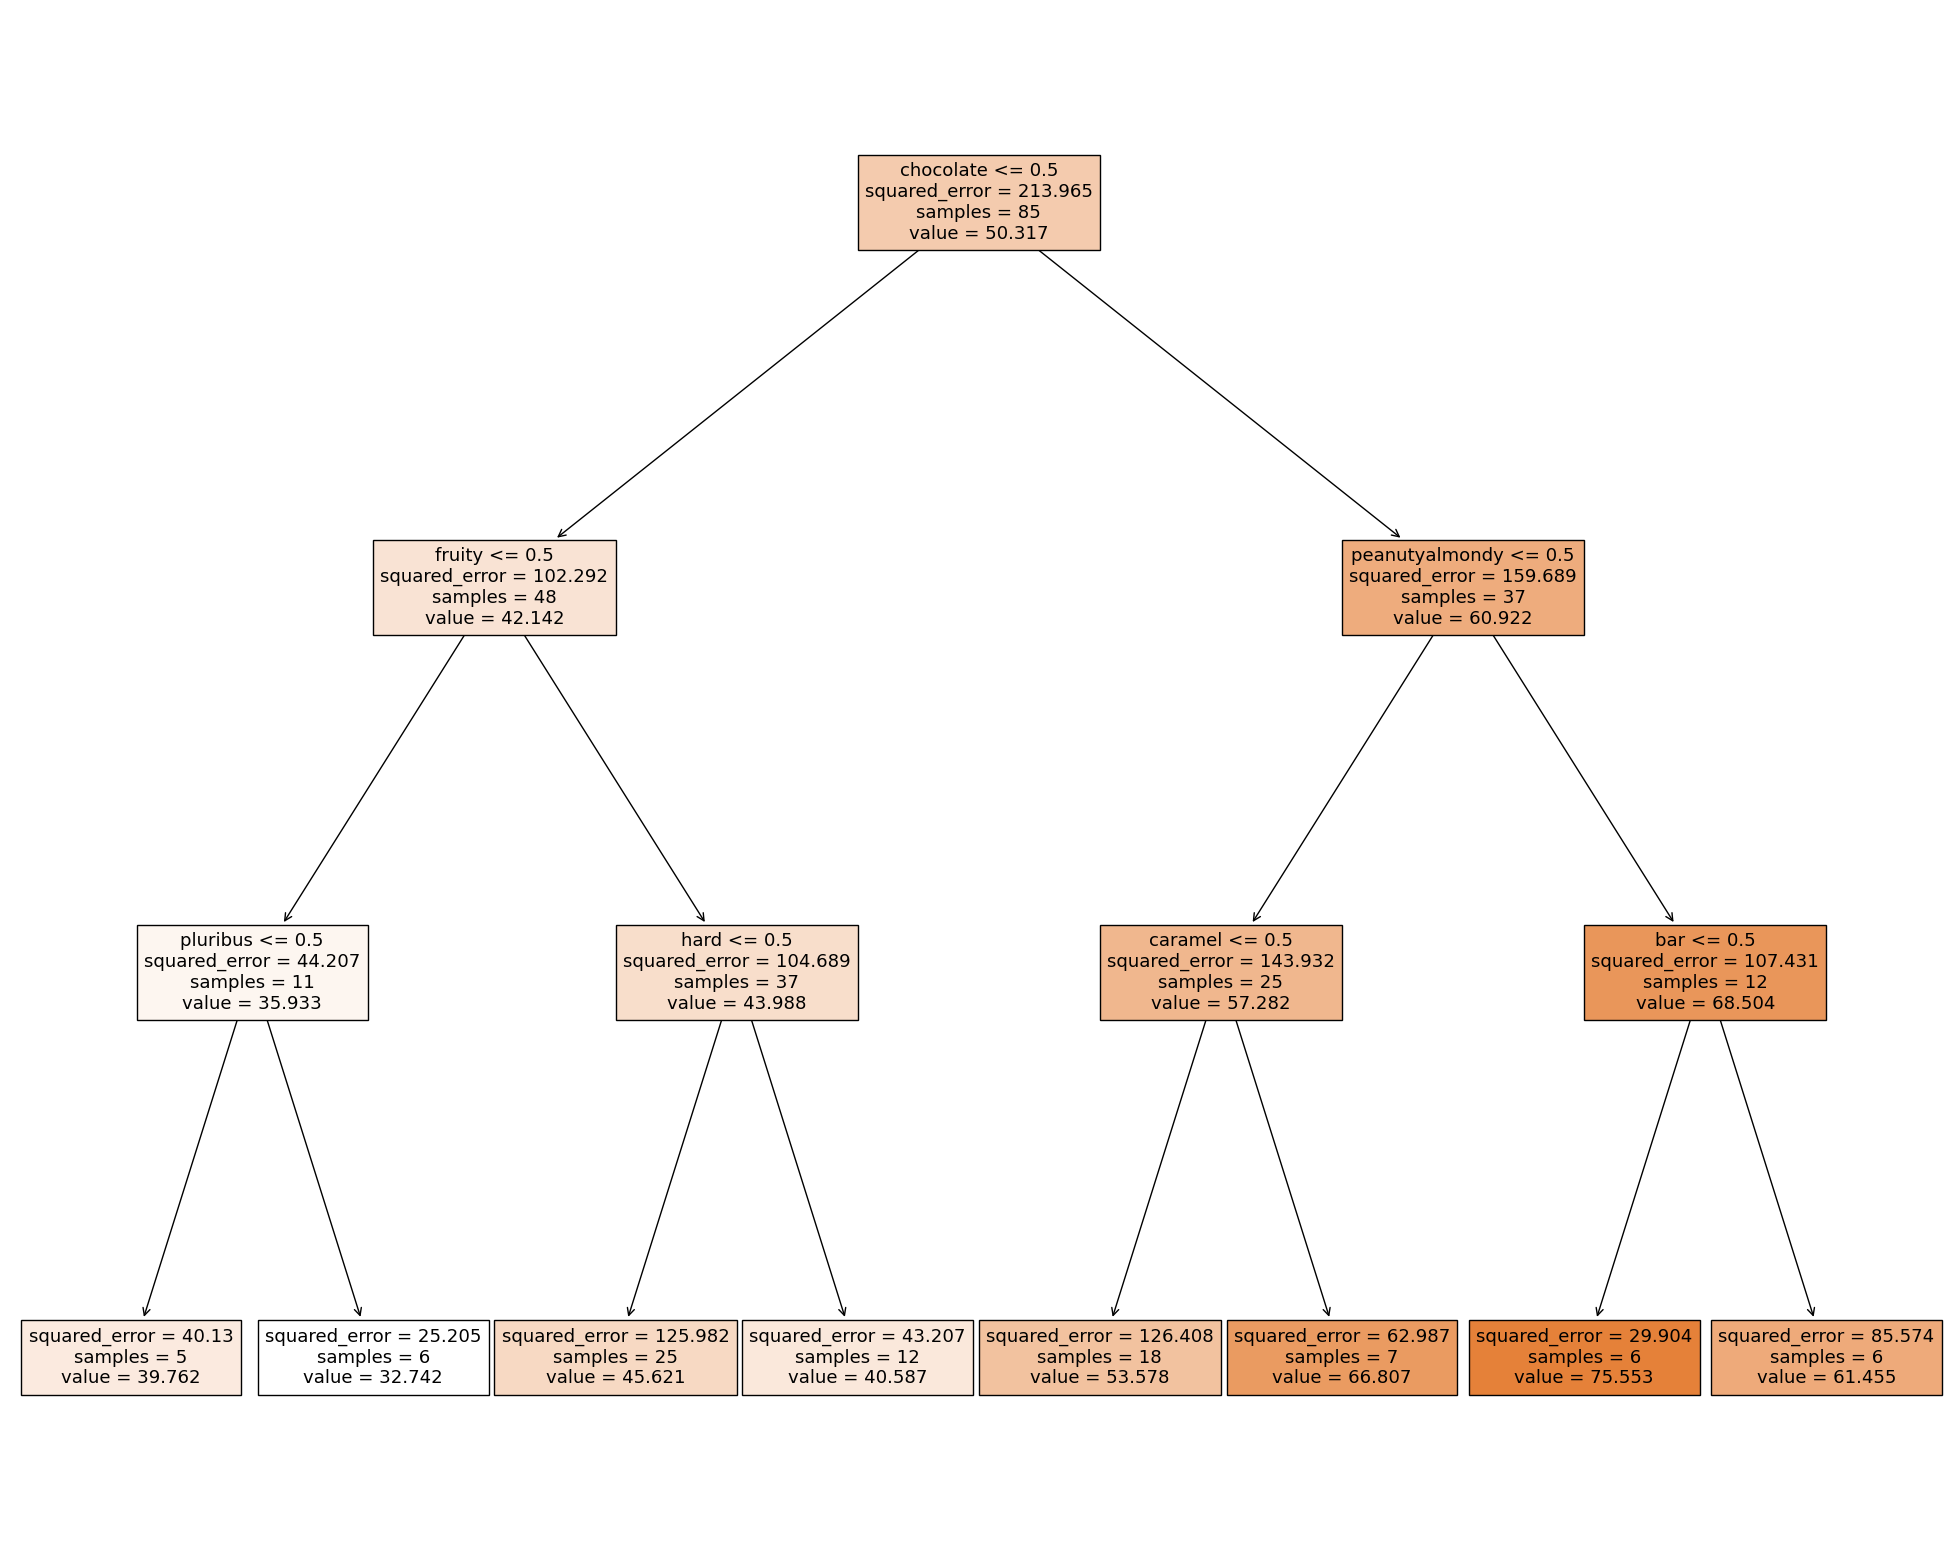

In [16]:
features = [feature for feature in df_candy.columns if feature not in [response, 'competitorname', 'sugarpercent_binned', 'pricepercent_binned', 'sugarpercent', 'pricepercent']]
X_train = df_candy[features]
y_train = df_candy[response]

dtree = DecisionTreeRegressor(random_state=123, max_depth=3)
dftree_fit = dtree.fit(X_train, y_train)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(dftree_fit,
               feature_names=features,
               filled=True)

dtree_prediction = dtree.predict(X_train)
classnames, prediction_nodes = np.unique(dtree_prediction, return_inverse=True)

print(classnames)
print(prediction_nodes)


The best group with average 75.5% win rate is group which can be characterized as chocolate, peanutyalmody and not bar. 
Second best group with average 66.8% winrate is group chocolate, not peanutyalmody and caramel.

It might be interesting to see also goups with worst win rates. The worst one is not chocolade, not fruity and pluribus has 32.7% winrate. Changing just last condition to not pluribus is increasing win rate to 39.7% which is still second worst. So not chocolate and not fruity is the worst combination for candy. 

Then fruity and hard candies are third worst combination.

So if we are going to introduce new candy we might want to bet on the candy types which work well for people so best or second best category would be good pick for candy type. On the other hand it seems that this part of market maybe too competitive, people already like products and maybe we would have lower chance to persuade them to switch to new brand. So the option two would be to pick one of the worst groups and based our new candy on that. For example fruity and hard candy doesn't sound as a bad choice. We first might need to do some resarch why people dislike these candies because from this dataset we don't have all relevant information. For example other factors like volume of marketing or production quality could give us some answers.

## Principal Component Analysis

This is a technique to reduce dimensionality of data, we will use it for two-dimensional visualizations. 

In [17]:
X_standard = StandardScaler().fit_transform(X_train)

pca_analysis = PCA(n_components=2)
X_pca = pca_analysis.fit_transform(X_standard)

df_visualization = df_candy.copy()
df_visualization['nodes_first'] = np.where(prediction_nodes == 7, "1. Best Candies", "2. Other Candies")
df_visualization['nodes_second'] = np.where(prediction_nodes == 6, "1. Second Best Candies", "2 .Other Candies")
df_visualization['nodes_best&worst'] = np.where(
    prediction_nodes == 7, "1. Best Candies", 
    np.where(prediction_nodes == 6, 
             "2. Second Best Candies",
             np.where(prediction_nodes == 2, 
                      "3. Third Worst Candies",
                      np.where(prediction_nodes == 1, 
                               "4. Second Worst",
                               np.where(prediction_nodes == 0, "5. Worst Candies", "6. Other Candies")
                               )
                      )
             )
    )
    
df_visualization['all_nodes'] = prediction_nodes
df_visualization[['principal_component_1', 'principal_component_2']] = X_pca

pca_analysis.explained_variance_ratio_

array([0.39088721, 0.13455845])

In [18]:
hover_features = [col for col in df_candy.columns if col not in [response, 'competitorsname']]
fig = px.scatter(df_visualization, x='principal_component_1', y=response, color='nodes_first', hover_name="competitorname", hover_data=hover_features)
fig.update_traces(marker=dict(size=20),
                  selector=dict(mode='markers'))
fig.update_layout(height=800)
fig.show()

fig = px.scatter(df_visualization, x='principal_component_1', y=response, color='nodes_second', hover_name="competitorname", hover_data=hover_features)
fig.update_traces(marker=dict(size=20),
                  selector=dict(mode='markers'))
fig.update_layout(height=800)
fig.show()

fig = px.scatter(df_visualization, x='principal_component_1', y=response, color='nodes_best&worst', hover_name="competitorname", hover_data=hover_features)
fig.update_traces(marker=dict(size=20),
                  selector=dict(mode='markers'))
fig.update_layout(height=800)
fig.show()

In [19]:
fig = px.scatter(df_visualization, x='principal_component_1', y=response, color='chocolate', hover_name="competitorname", hover_data=['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus'])
fig.update_traces(marker=dict(size=20),
                  selector=dict(mode='markers'))
fig.update_layout(height=800)
fig.show()